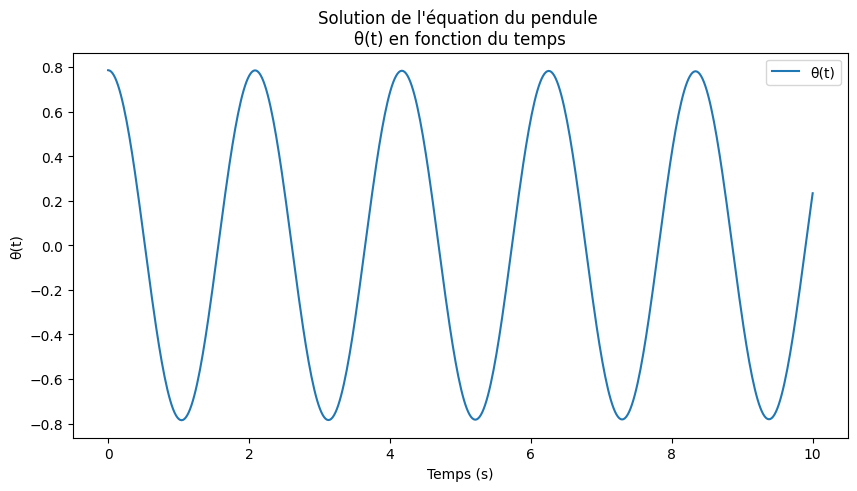

In [40]:
import numpy as np
import matplotlib.pyplot as pyplot
from scipy.integrate import solve_ivp

# Constantes
g = 9.81
l = 1.0

# Equation différentielle du pendule
def pendulum(t, y):
    theta, omega = y
    dtheta_dt = omega
    domega_dt = - (g / l) * np.sin(theta)
    return [dtheta_dt, domega_dt]


solution = solve_ivp(pendulum, t_span, y0, t_eval=t_eval)


pyplot.figure(figsize=(10, 5))
pyplot.plot(solution.t, solution.y[0], label='θ(t)')
pyplot.legend()
pyplot.xlabel('Temps (s)')
pyplot.ylabel('θ(t)')
pyplot.title('Solution de l\'équation du pendule \nθ(t) en fonction du temps')
pyplot.savefig('pendulum_solution.png', transparent=True)
pyplot.show()

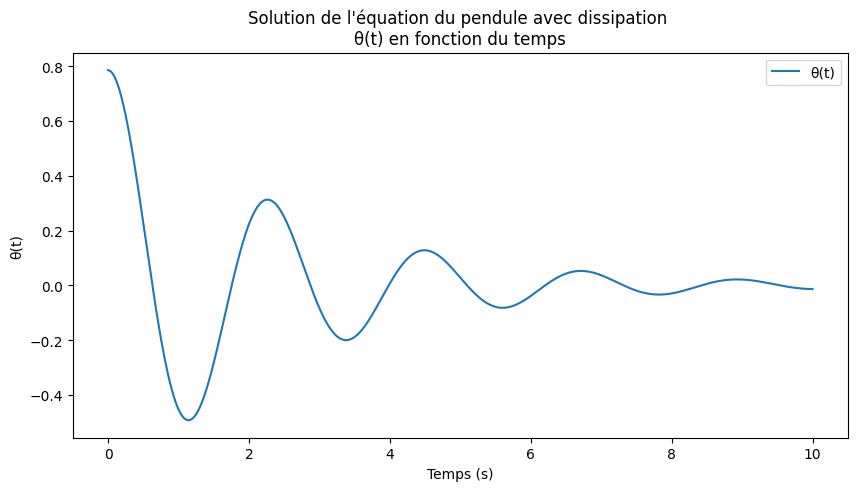

In [38]:
g = 9.81
l = 1.2
b = 0.8  # Coefficient de frottement

def pendulum(t, y):
    theta, omega = y
    dtheta_dt = omega
    domega_dt = - (g / l) * np.sin(theta) - b * omega
    return [dtheta_dt, domega_dt]

solution = solve_ivp(pendulum, t_span, y0, t_eval=t_eval)

pyplot.figure(figsize=(10, 5))
pyplot.plot(solution.t, solution.y[0], label='θ(t)')
pyplot.legend()
pyplot.xlabel('Temps (s)')
pyplot.ylabel('θ(t)')
pyplot.title('Solution de l\'équation du pendule avec dissipation \nθ(t) en fonction du temps')
pyplot.savefig('pendulum_solution_with_dissipation.png', transparent=True)
pyplot.show()


In [ ]:
from manim import *
import numpy as np
from scipy.integrate import solve_ivp

g = 9.81
l = 1.0

def pendulum(t, y):
    theta, omega = y
    dtheta_dt = omega
    domega_dt = - (g / l) * np.sin(theta)
    return [dtheta_dt, domega_dt]

t_span = [0, 10]  
y0 = [np.pi / 4, 0] 
t_eval = np.linspace(t_span[0], t_span[1], 1000)  

sol = solve_ivp(pendulum, t_span, y0, t_eval=t_eval)

class PendulumAnimation(Scene):
    def construct(self):
        pendulum_length = 2
        pendulum_mass_radius = 0.1

        pivot = Dot(ORIGIN, color=WHITE)
        pendulum_line = Line(ORIGIN, [0, -pendulum_length, 0], color=BLUE)
        pendulum_mass = Circle(radius=pendulum_mass_radius, color=RED, fill_opacity=1).move_to(pendulum_line.get_end())

        self.add(pivot, pendulum_line, pendulum_mass)


        def update_pendulum(mob, dt):
            time = self.time_tracker.get_value()  
            theta = np.interp(time, sol.t, sol.y[0])  
            x = pendulum_length * np.sin(theta)
            y = -pendulum_length * np.cos(theta)
            new_end = np.array([x, y, 0])
            pendulum_line.put_start_and_end_on(ORIGIN, new_end)
            pendulum_mass.move_to(new_end)

        self.time_tracker = ValueTracker(0)

        pendulum_line.add_updater(update_pendulum)
        pendulum_mass.add_updater(update_pendulum)

        self.play(self.time_tracker.animate.set_value(t_span[1]), run_time=10, rate_func=linear)

        pendulum_line.remove_updater(update_pendulum)
        pendulum_mass.remove_updater(update_pendulum)

%manim -ql PendulumAnimation


Manim Community v0.18.1

[01/03/25 00:40:27] INFO     Animation 0 : Using cached data (hash :                           ]8;id=138328;file:///home/robin/venvs/manim_env/lib/python3.12/site-packages/manim/renderer/cairo_renderer.py\cairo_renderer.py]8;;\:]8;id=420868;file:///home/robin/venvs/manim_env/lib/python3.12/site-packages/manim/renderer/cairo_renderer.py#88\88]8;;\
                             1185818338_877201341_4193742400)                                                      

                    INFO     Combining to Movie file.                                      ]8;id=185819;file:///home/robin/venvs/manim_env/lib/python3.12/site-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=470418;file:///home/robin/venvs/manim_env/lib/python3.12/site-packages/manim/scene/scene_file_writer.py#617\617]8;;\

                    INFO                                                                   ]8;id=558263;file:///home/robin/venvs/manim_env/lib/python3.12/site-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=258206;file:///home/robin/venvs/manim_env/lib/python3.12/site-packages/manim/scene/scene_file_writer.py#737\737]8;;\
                             File ready at                                                                         
                             '/home/robin/Documents/pendulum/media/videos/pendulum/480p15/                         
                             PendulumAnimation.mp4'                                                                
                                                                                                                   

                    INFO     Rendered PendulumAnimation                                                ]8;id=851725;file:///home/robin/venvs/manim_env/lib/python3.12/site-packages/manim/scene/scene.py\scene.py]8;;\:]8;id=196547;file:///home/robin/venvs/manim_env/lib/python3.12/site-packages/manim/scene/scene.py#247\247]8;;\
                             Played 1 animations                                                                   